<a href="https://colab.research.google.com/github/Louis-Emekene/Hands_on_Machine_Learning/blob/main/CIFAR10_CNN_Custom_Qs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import PIL

## CIFAR10 Augmentation

In [2]:
# Scaling #(0.9,0.9) #(1.1,1.1)
import torchvision.transforms as T
transform = T.Compose([T.RandomAffine(scale=(0.9,1.1), degrees=0, interpolation = T.InterpolationMode.NEAREST ),
                               T.ToTensor(),
                               ])

#T.InterpolationMode.BILINEAR , interpolation attribute work in newer versions of pytorch

training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 44414389.02it/s]


Extracting data/cifar-10-python.tar.gz to data


In [11]:
transform = T.Compose([T.ToTensor(),])
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
len(train_loader.dataset) #.sampler

Files already downloaded and verified


50000

In [3]:
# Translation
import torchvision.transforms as T
transform = T.Compose([T.RandomAffine(translate =(0.1,0), degrees=0,
                                               interpolation = T.InterpolationMode.NEAREST ),
                                T.ToTensor(),
                               ])
#translate =(0.1,0) x translation up to 10% of image width. No translation in height

training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified


In [4]:
#Random affine applies each one of the used transforms but with random parameters
# All
import torchvision.transforms as T
transform = T.Compose([T.RandomAffine(translate =(0.1,0.1), degrees=10, scale=(0.9,1.1),
                                               interpolation = T.InterpolationMode.NEAREST ),
                               T.ToTensor(),
                               ])
#degrees=10 is randomly taken a value from 0 - 10
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified


In [5]:
# ColorJitter Randomly change the brightness, contrast, saturation and hue of an image
import torchvision.transforms as T
transform = T.Compose([T.ColorJitter(brightness=(0.5,1),contrast=(0,.5),saturation = (0,0.5),hue=(0,0.5)),
                                T.ToTensor(),
                               ])
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified


In [6]:
#Random Horizontal flib
import torchvision.transforms as T
transform = T.Compose([T.RandomHorizontalFlip(p=0.5),
                                T.ToTensor(),
                               ])
#RandomVerticalFlip

training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified


In [7]:
def train_imshow(data_loader):
    dataiter = iter(data_loader)

    images_RGB, labels = next(dataiter) #dataiter.next() in older versions
    #print(images_RGB[0].shape)
    fig, axes = plt.subplots(figsize=(20, 8), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images_RGB[i].permute(1, 2, 0))  #Permute Converts image size from 3x32x32 to 32x32x3
        #print(images_RGB[i].permute(1, 2, 0).shape)
        ax.title.set_text(' '.join('%5s' % data_loader.dataset.classes[labels[i]])) #name the image of class value
    plt.show()

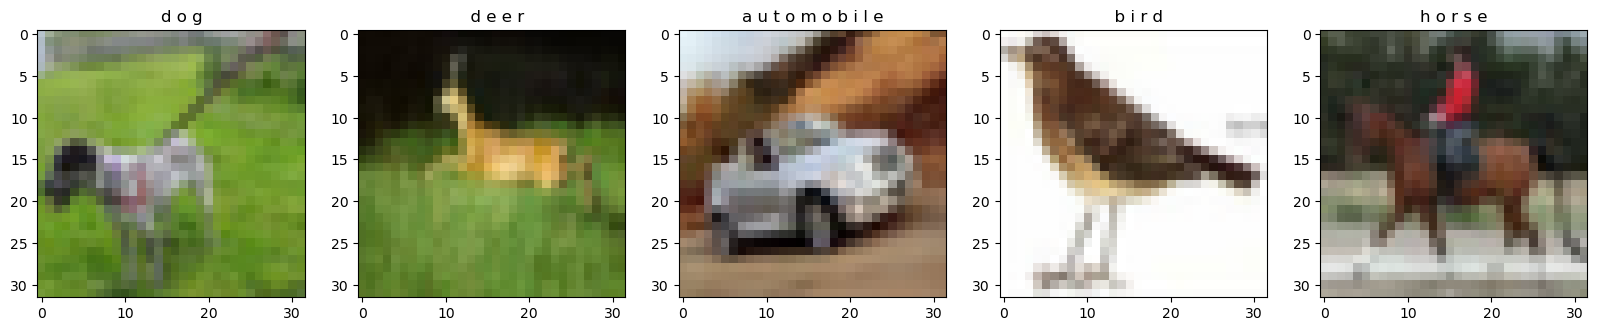

In [ ]:
train_imshow(train_loader)

## Splitting and Normalization


In [8]:
# Establish our transform
transform = T.Compose([T.ToTensor(),
                               ])
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
print(len(training_data))
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified
50000


In [9]:
def Normalize(dataloader):
    #finding mean and std for input images

    RGB_channels_sum, Depth_channels_sum, RGB_channels_squared_sum, Depth_channels_squared_sum, num_batches= 0, 0, 0,0,0

    for data,label in dataloader:  #loops the batches
        # Mean over batch, height and width, but not over the channels
        #mean of all images in batch but not over the channels(each channel has its own mean)
        RGB_channels_sum += torch.mean(data, dim=[0,2,3]) #64 x3x 32x32 channel mean for each batch gets accumulated
        RGB_channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1

    mean_rgb = RGB_channels_sum / num_batches #mean of each channel

    # std = sqrt(E[X^2] - (E[X])^2)
    std_RGB = (RGB_channels_squared_sum / num_batches - mean_rgb ** 2) ** 0.5
    print(f"Mean is {mean_rgb}, standard deviation is {std_RGB}")

    return mean_rgb,std_RGB

Normalize(train_loader)

Mean is tensor([0.4914, 0.4822, 0.4465]), standard deviation is tensor([0.2470, 0.2435, 0.2616])


(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [12]:
# Establish our transform
transform = T.Compose([T.ToTensor(),
                                T.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
                               ])

# Load train and test datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)

# Create the training and test dataloaders with a batch size of 32
train_loader2 = DataLoader(training_data, batch_size=32, shuffle=True)

Files already downloaded and verified


In [13]:
#Check that standardization is done Correctly
Normalize(train_loader2)

Mean is tensor([-1.8186e-05, -1.5337e-04,  1.6960e-04]), standard deviation is tensor([1.0001, 0.9999, 1.0000])


(tensor([-1.8186e-05, -1.5337e-04,  1.6960e-04]),
 tensor([1.0001, 0.9999, 1.0000]))

In [14]:
# To Do: Show one image shape
training_data[0][0].shape

torch.Size([3, 32, 32])

### Overall transform

In [15]:
# ToDo: Establish our transform

# Load train and test datasets
training_data = datasets.CIFAR10(root="data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root="data", train=False, download=True, transform=transform)

#To Do: Split train dataset, create train and test dataloaders

# Create the training and test dataloaders with a batch size of 32
train_loader3 = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


NameError: ignored

# Activation and Output Functions
In this exercise, you'll explore how activation functions and output functions impact the ability of neural networks to learn.

Most of the code will be provided for you, and you'll have to fill in the blanks!
Consider trying a few different combinations of activation functions to get a better idea of how the activation function impacts training.

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cpu')

### Create CNN Model architecture

In [17]:
class Cifar10_CNN(nn.Module):
    def __init__(self):
        # We optimize dropout rate in a convolutional neural network.
        super(Cifar10_CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 3, out_channels=16, kernel_size=3, stride=1, padding= 1)
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
        #ToDo: Create a seconed Batch normalization layer called self.bn2

        self.drop1=nn.Dropout2d(p=0.5)

        ## ToDo: Create a MaxPool Layer of size (2,2) name it self.pool
        self.pool = nn.MaxPool2d(kernel_size = 2)

        self.fc1 = nn.Linear(1568, 500)
        self.bn3 = nn.BatchNorm1d(500)   ###### Notice BatchNorm1d
        self.drop2 = nn.Dropout1d(p=0.2) ###### Notice Dropout1d
        self.fc2 = nn.Linear(500, 10) # 10 classes

    def forward(self, x):

        x = self.pool(self.bn1(F.relu(self.conv1(x))))  # 3 x 30 x 30 ->  16 x 30 x 30 ->  16 x 15 x 15
        x = self.pool(self.bn2(F.relu(self.conv2(x))))  # 16 x 15 x 15   -->  32 x 15 x 15 ->  32 x 7 x 7
        x = self.drop1(x)

        x = x.view(x.size(0),-1)             #7x7x32-->1568

        x = self.bn3(F.relu(self.fc1(x)))              #1568 ->500
        x = self.drop2(x)

        x = self.fc2(x)                      #500--> 10

        return x

# Do not change the name of your model or later cells may fail!
CifarCNN = Cifar10_CNN()
CifarCNN.to(device)

Cifar10_CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (drop1): Dropout2d(p=0.5, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (bn3): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout1d(p=0.2, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

### Specify Optimizer and Losse

In [18]:
optimizer = optim.Adam(CifarCNN.parameters(), lr=0.002)
criterion= nn.CrossEntropyLoss()

In [20]:
history={'train_loss':[],'valid_loss':[],'train_acc':[],'valid_acc':[]}
num_epochs=10
Validation_loss=float(inf)

for epoch in range(num_epochs):
    train_loss,train_correct=0.0,0

    CifarCNN.train()
    for images, labels in train_loader3:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = CifarCNN(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()     #Correctly classified Images

    valid_loss, val_correct = 0.0, 0
    CifarCNN.eval()
    for images, labels in valid_loader:

        images,labels = images.to(device),labels.to(device)
        output = CifarCNN(images)
        loss=criterion(output,labels)
        valid_loss+=loss.item()*images.size(0)
        scores, predictions = torch.max(output.data,1)
        val_correct += (predictions == labels).sum().item()

    train_loss = train_loss / len(train_loader3.sampler)
    train_acc = train_correct / len(train_loader3.sampler)*100
    valid_loss = valid_loss / len(valid_loader.sampler)
    valid_acc = val_correct / len(valid_loader.sampler) * 100

    print("Epoch:{}/{} \t AVERAGE TL:{:.4f} AVERAGE VL:{:.4f} \t AVERAGE TA:{:.2f} %  AVERAGE VA:{:.2f} %".format(epoch + 1, num_epochs,
                                                                                         train_loss,
                                                                                         valid_loss,
                                                                                         train_acc,
                                                                                        valid_acc))
    #To Do: Check for best validation loss and use corresponding model

    history['train_loss'].append(train_loss)
    history['valid_loss'].append(valid_loss)
    history['train_acc'].append(train_acc)
    history['valid_acc'].append(valid_acc)

torch.save(best_model_state, 'CIFAR_CNN.pth')


NameError: ignored

### Complexity Graph

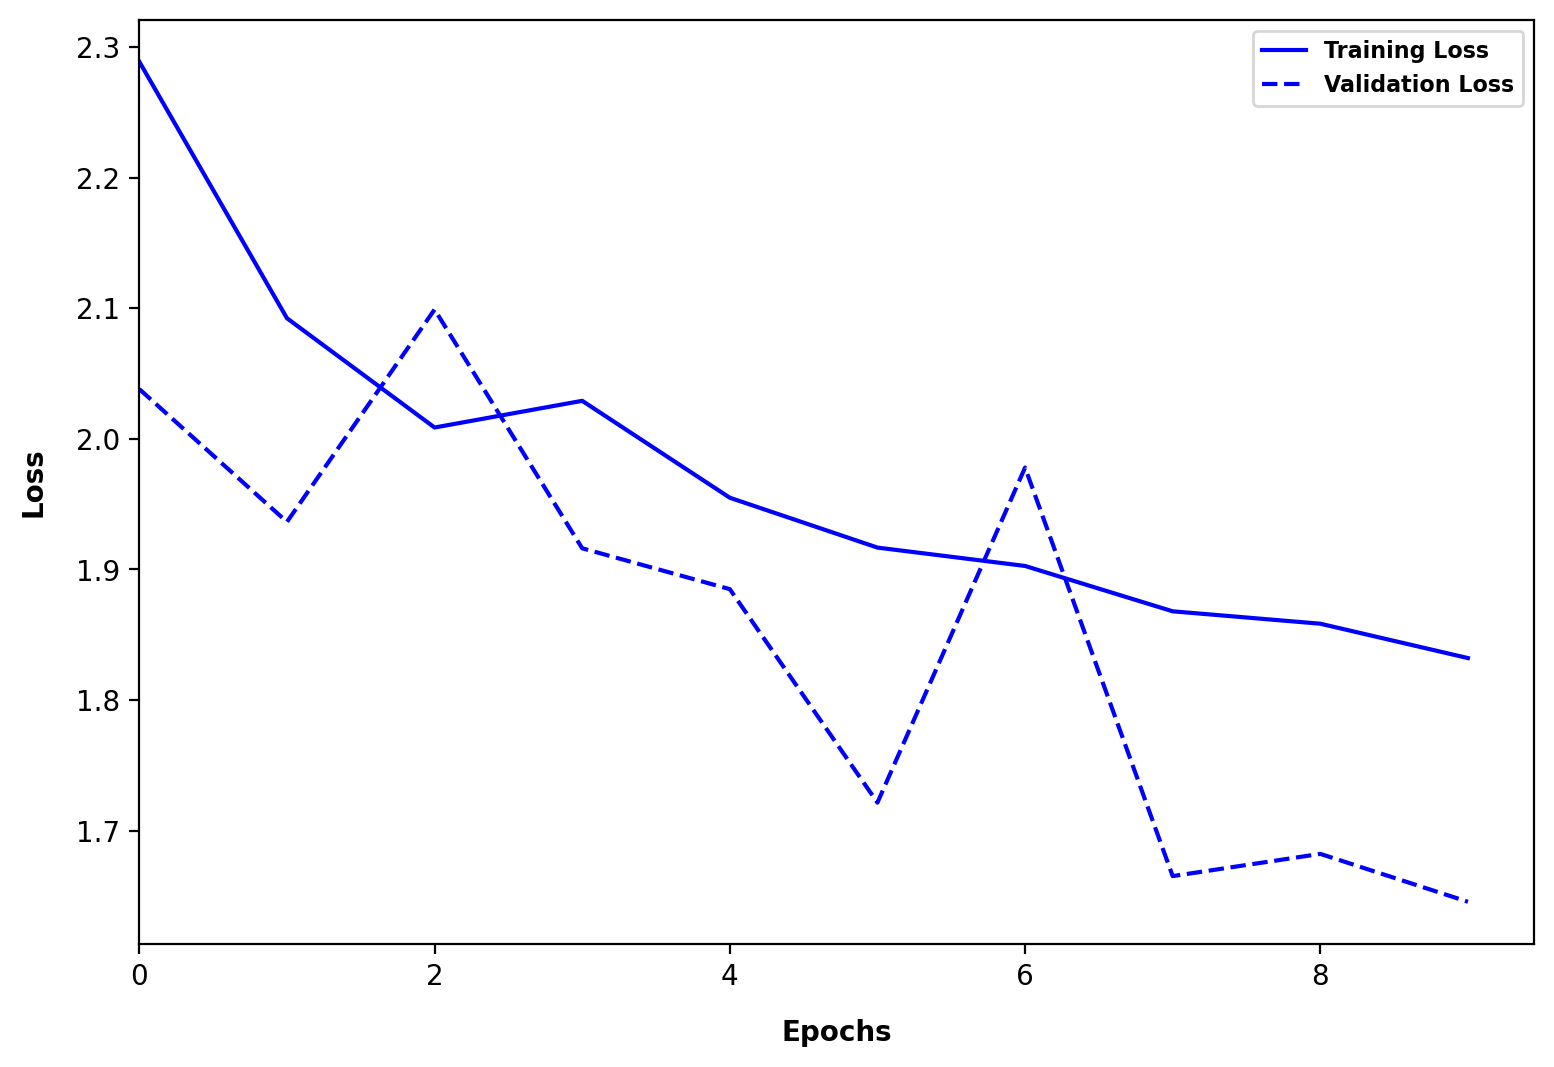

In [ ]:
epochs=10
fig=plt.figure(figsize=(9,6),dpi=200)
x=[epoch for epoch in range(epochs)]
plt.plot(x,history['train_loss'],'b',label='Training Loss')
plt.plot(x,history['valid_loss'],'b',linestyle='dashed',label='Validation Loss')

plt.xlabel("Epochs",fontweight='bold',labelpad=10)
plt.ylabel("Loss",fontweight='bold',labelpad=10)
plt.xlim(xmin = 0)

plt.legend(prop={'size': 8,'weight':'bold'},loc="best")

plt.savefig(r'Losses.png',bbox_inches="tight")
plt.show()

### Testing your model

In [21]:
correct = 0
total = 0
test_loss = 0
with torch.no_grad():

    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = CifarCNN(images)
        loss = criterion(outputs,labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = test_loss / len(test_loader.sampler)

print('Accuracy of the network on the test images: {:.2f} %%'.format(100 * correct / total))
print('Loss of the network on the test images: {:.4f}'.format(test_loss))

AttributeError: ignored